# Customer Segmentation using Python in Machine Learning

## __Author: Soma Dey__

### 1. Importing the dataset and all required libraries

In [1]:
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the data into a pandas dataFrame
df = pd.read_csv("C:/Users/SOMA/Documents/Python_Projects/Data Set/Mall_Customers.csv")

In [3]:
#Read the dataset
df.head() #printing first 5 records of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Now printing last 5 records of the dataset
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

- **This Customer Segmentation dataset has 200 rows and 5 columns**

### 2. Exploratory Data Analysis

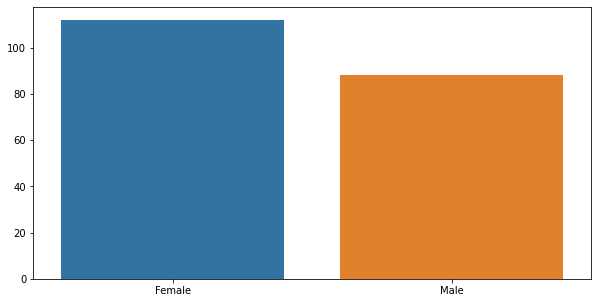

In [7]:
# Now we have to find out gender distribution between males and females.

genders=df.Gender.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [8]:
# Now I have visualized the different customers with age groups

age18_25 = df.Age[(df.Age<=25)&(df.Age>=18)]
age26_35 = df.Age[(df.Age<=35)&(df.Age>=26)]
age36_45 = df.Age[(df.Age<=45)&(df.Age>=36)]
age46_55 = df.Age[(df.Age<=55)&(df.Age>=46)]
age55above = df.Age[(df.Age>=56)]

In [9]:
x=["18-25","26-35","36-45","46-55","Above55"]
y=[len(age18_25.values), len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

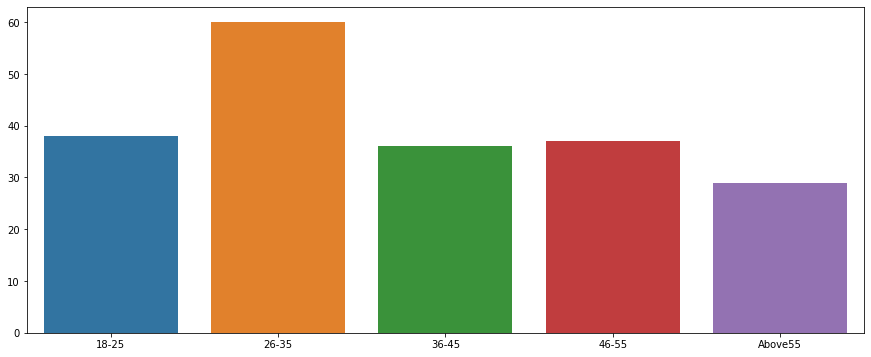

In [10]:
plt.figure(figsize=(15,6))
plt.title=("Number of customers and ages")
plt.xlabel=("Ages")
plt.ylabel=("Number of customers")
sns.barplot(x=x,y=y)
plt.show()

- **So by this, we can say that customers of age group 26-35 are more in number than the other age groups**

In [11]:
# Now we are going to visualize the highest spending scores among the customers

ss1_20= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1) &(df["Spending Score (1-100)"]<=20)]
ss21_40= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21) &(df["Spending Score (1-100)"]<=40)] 
ss41_60= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41) &(df["Spending Score (1-100)"]<=60)]
ss61_80= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61) &(df["Spending Score (1-100)"]<=80)]
ss81_100= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81) &(df["Spending Score (1-100)"]<=100)]

In [12]:
x=["1-20","21-40","41-60","61-80","81-100"]
y=[len(ss1_20.values), len(ss21_40.values),len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]

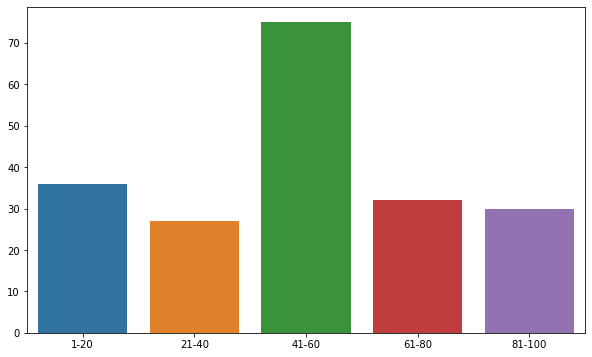

In [13]:
plt.figure(figsize=(10,6))
plt.title=("Spending scores of the customers")
plt.xlabel=("Spending Scores")
plt.ylabel=("score of customers")
sns.barplot(x=x , y=y)
plt.show()

- **So based on the bar graph we can see that the majority of spending scores among the customers is between 41-60**

In [14]:
# Now we are going to visualize the annual income of the customers

ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0)&(df["Annual Income (k$)"]<=30)] 
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31)&(df["Annual Income (k$)"]<=60)] 
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61)&(df["Annual Income (k$)"]<=90)] 
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91)&(df["Annual Income (k$)"]<=120)] 
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121)&(df["Annual Income (k$)"]<=150)]

In [15]:
x=["0-30","31-60", "61-90","91-120","121-150"]
y=[len(ai0_30.values), len(ai31_60.values), len(ai61_90.values),len(ai91_120.values), len(ai121_150.values)]

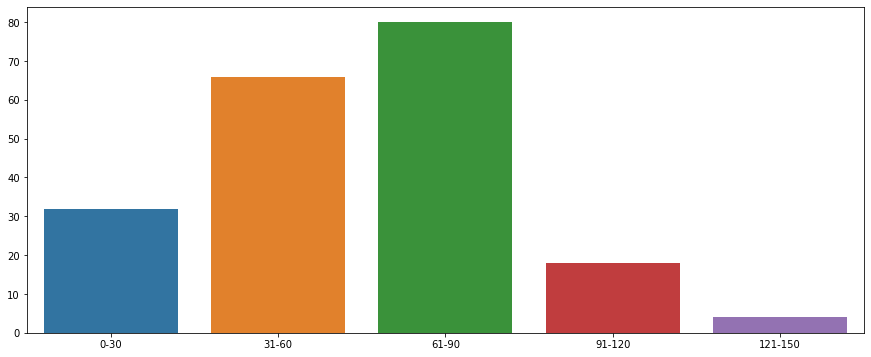

In [16]:
plt.figure(figsize=(15,6))
plt.title=("Annual Income of customers")
plt.xlabel=("Annual Income in k$")
plt.ylabel=("Number of customers")
sns.barplot(x=x,y=y)
plt.show()

- __The graph obtained shows that the majority of customers have the annual income between 61-90$__

### 3. Finding the optimum number of clusters

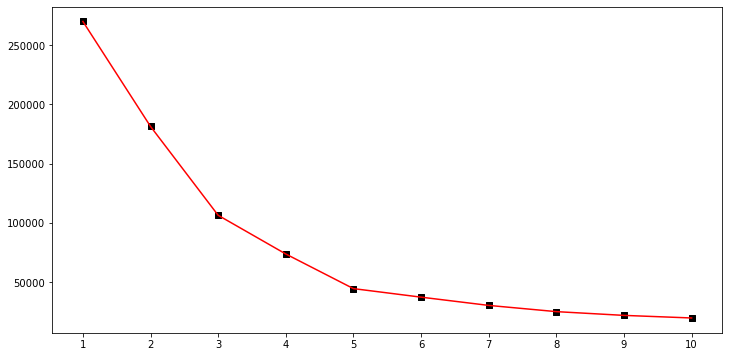

In [17]:
from sklearn.cluster import KMeans
x = df.iloc[:, [3,4]].values
wcss=[] #Within cluster sum of squares


for i in range(1,11):
    kmeans=KMeans(n_clusters=i , init='k-means++',
                  max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

#Ploting Elbow Method
plt.figure(figsize=(12,6))
plt.scatter(range(1, 11), wcss,marker="s",c="black")
plt.plot(range(1,11),wcss,c="red")
plt.xlabel=('KValue')
plt.ylabel=('WCSS')

#for value of k from 1 to 10 in graph
plt.xticks(np.arange(1,11,1))
plt.title=("Elbow Graph")

plt.show()

+ **In this method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square (wcss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters**

+ **From the obtained graph we can observe that at point 5 there is a maximum inflection in the curve. So we can use 5 clusters in K means algorithm**

### 4. Modeling and visualization with KMeans Algorithm

In [18]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)

y_kmeans = kmeansmodel.fit_predict(x)

#predicted values
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

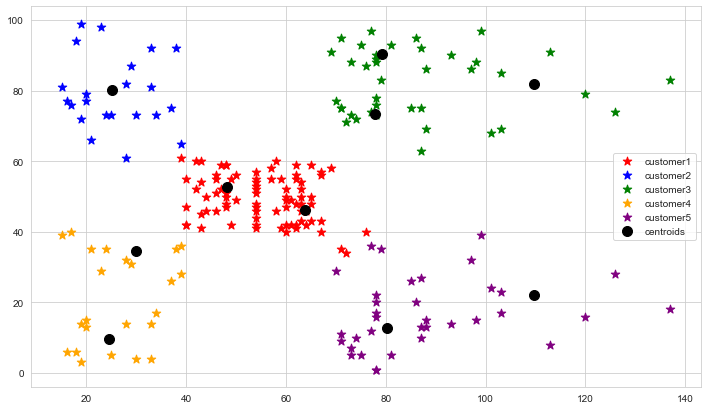

In [19]:
#Visualizing the K-means Clusters
sns.set_style("whitegrid");

plt.figure(figsize=(12,7))

plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=80,c='red', label='customer1' , marker="*")
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=80,c='blue', label='customer2' , marker="*")
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=80,c='green', label='customer3' , marker="*")
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=80,c='orange', label='customer4' , marker="*")
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1], s=80,c='purple', label='customer5' , marker="*")

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], s=100, c="black", label="centroids")

plt.title = (str('cluster of customers'))
plt.xlabel = (str('Annual Income'))
plt.ylabel = (str('Spending Scores'))

plt.legend()
plt.show()

#### Conclusion: We have classified the customers into 5 clusters through which we can see that customer1 is having average spending scores with the  average income so this range of customers can be targeted in order to increase sales.

# Thank You